# Import Dependencies

In [1]:
# For plotting
import matplotlib.pyplot as plt

#Handling arrays
import numpy as np

#Handling Dataframes
import pandas as pd

#Splitting the data
from sklearn.model_selection import train_test_split

#Machine Learning Models 
from sklearn.tree import DecisionTreeRegressor

#Perofromance Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#Handling Tensors
import torch

#Handling Neural Networks
import torch.nn as nn

## Loading and viewing data

In [2]:
df = pd.read_csv('household_power_consumption.txt', sep = ';')

C:\Users\Sumit\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


## Cleaning Data

### Search for non-float entries and delete

In [4]:
df = df.replace('?',None)
df.dropna

<bound method DataFrame.dropna of                Date      Time Global_active_power Global_reactive_power  \
0        16/12/2006  17:24:00               4.216                 0.418   
1        16/12/2006  17:25:00               5.360                 0.436   
2        16/12/2006  17:26:00               5.374                 0.498   
3        16/12/2006  17:27:00               5.388                 0.502   
4        16/12/2006  17:28:00               3.666                 0.528   
5        16/12/2006  17:29:00               3.520                 0.522   
6        16/12/2006  17:30:00               3.702                 0.520   
7        16/12/2006  17:31:00               3.700                 0.520   
8        16/12/2006  17:32:00               3.668                 0.510   
9        16/12/2006  17:33:00               3.662                 0.510   
10       16/12/2006  17:34:00               4.448                 0.498   
11       16/12/2006  17:35:00               5.412                 

In [5]:
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

## Finding significant parameters

count    2.075259e+06
mean     1.110995e+00
std      6.115908e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      8.800000e+01
Name: Sub_metering_1, dtype: float64

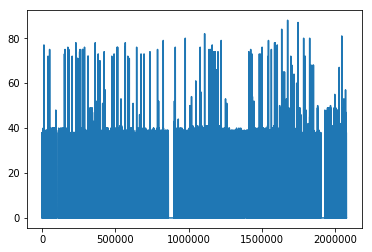

In [6]:
df['Sub_metering_1'] = pd.Series(np.array([float(j) for j in df['Sub_metering_1'].values]))
plt.plot(df['Sub_metering_1'].values)
df['Sub_metering_1'].describe()

count    2.075259e+06
mean     1.287958e+00
std      5.786865e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      8.000000e+01
Name: Sub_metering_2, dtype: float64

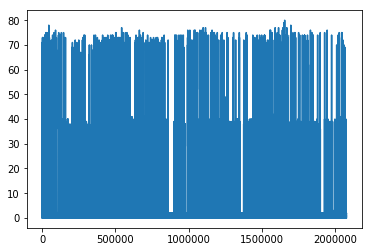

In [7]:
df['Sub_metering_2'] = pd.Series(np.array([float(j) for j in df['Sub_metering_2'].values]))
plt.plot(df['Sub_metering_2'].values)
df['Sub_metering_2'].describe()

count    2.049280e+06
mean     6.458447e+00
std      8.437154e+00
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      1.700000e+01
max      3.100000e+01
Name: Sub_metering_3, dtype: float64

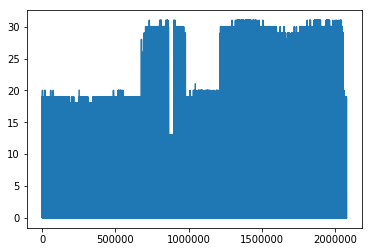

In [8]:
df['Sub_metering_3'] = pd.Series(np.array([float(j) for j in df['Sub_metering_3'].values]))
plt.plot(df['Sub_metering_3'].values)
df['Sub_metering_3'].describe()

count    2.075259e+06
mean     2.408416e+02
std      3.235574e+00
min      2.232000e+02
25%      2.390000e+02
50%      2.410200e+02
75%      2.428700e+02
max      2.541500e+02
Name: Voltage, dtype: float64

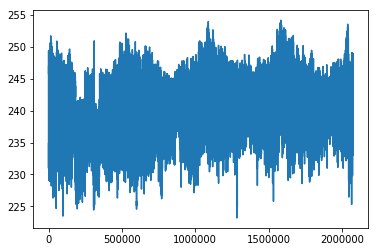

In [9]:
df['Voltage'] = pd.Series(np.array([float(j) for j in df['Voltage'].values]))
plt.plot(df['Voltage'].values)
df['Voltage'].describe()

count    2.075259e+06
mean     1.233280e-01
std      1.125144e-01
min      0.000000e+00
25%      4.800000e-02
50%      1.000000e-01
75%      1.940000e-01
max      1.390000e+00
Name: Global_reactive_power, dtype: float64

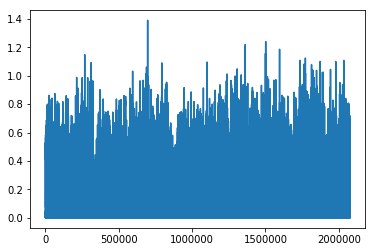

In [10]:
df['Global_reactive_power'] = pd.Series(np.array([float(j) for j in df['Global_reactive_power'].values]))
plt.plot(df['Global_reactive_power'].values)
df['Global_reactive_power'].describe()

count    2.075259e+06
mean     1.086168e+00
std      1.053172e+00
min      7.600000e-02
25%      3.080000e-01
50%      5.980000e-01
75%      1.524000e+00
max      1.112200e+01
Name: Global_active_power, dtype: float64

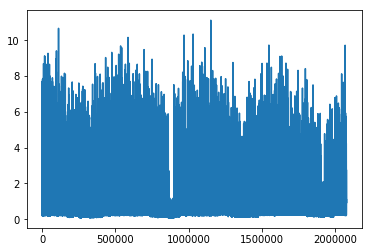

In [11]:
df['Global_active_power'] = pd.Series(np.array([float(j) for j in df['Global_active_power'].values]))
plt.plot(df['Global_active_power'].values)
df['Global_active_power'].describe()

## Check for periodicity

### Finding tentative segment width

#### Number of entries above certain tresholds

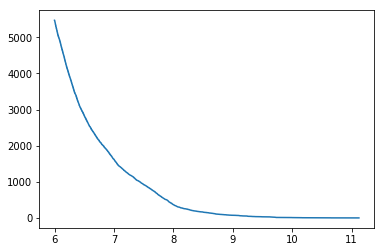

In [12]:
plt.plot(0.001*np.arange(6000,np.max(df['Global_active_power'])*1000),np.array([len(df[df['Global_active_power']>x].index) for x in 0.001*np.arange(6000,np.max(df['Global_active_power'])*1000)]))

In [13]:
df[df['Global_active_power']>9.5].index

Int64Index([ 112448,  112449,  112450,  112451,  535805,  542860,  584768,
             584769,  584790,  586200,  586201,  968160,  968161,  968163,
            1029773, 1029774, 1029775, 1110009, 1150544, 1150545, 1150546,
            1546690, 1546691, 1546692, 1546693, 1546694, 1546695, 2066458,
            2066459, 2066460, 2066461, 2066462],
           dtype='int64')

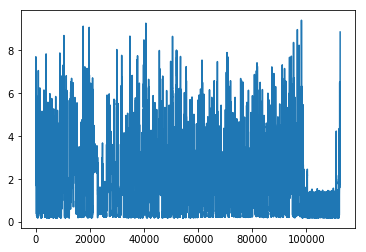

In [14]:
plt.plot(df['Global_active_power'].values[:112448])

In [15]:
W = np.argmax(df['Global_active_power'][[535805,  542860,  584768,584769,  584790,  586200,  586201]])
W

C:\Users\Sumit\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:51: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


586200

In [16]:
MaxRange = int(df.shape[0]/W)*W
MaxRange

1758600

In [17]:
Ref = np.array(list(df['Global_active_power'][:W].values)*2)

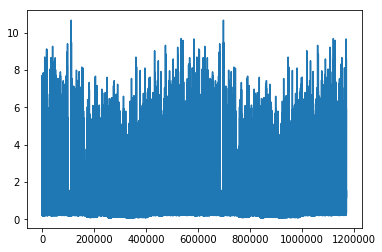

In [18]:
plt.plot(Ref)

In [19]:
Diff = abs(Ref-df['Global_active_power'][W:MaxRange].values)

In [20]:
np.mean(Diff)

1.0699364261344246

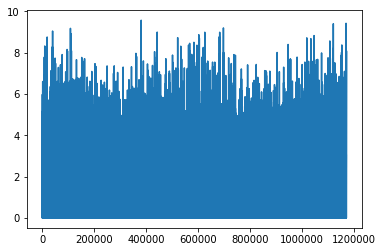

In [21]:
plt.plot(Diff)

### Check seasonalitiy

#### Assigning Months and Seasons to entries on different dates

In [22]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.400,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.000,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.000,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.000,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.800,0.0,1.0,17.0


In [23]:
Months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June','July','Aug','Sept', 'Oct', 'Nov', 'Dec']
Seasons = ['Winter','Winter','Spring','Spring','Spring','Summer','Summer','Summer','Fall','Fall','Fall','Winter']
Month = []
Season = []
dd = 0

In [24]:
for date in df['Date']:
    if(date[1]=='/'):
        date = date[2:4]
    else:
        date = date[3:5]
    #print(date)
    
    if(date[1]=='/'):
        date = date[0]
    
    #print(date)
    
    Month.append(Months[int(date)-1])
    Season.append(Seasons[int(date)-1])

In [25]:
df['Month'] = pd.Series(Month)
df['Season'] = pd.Series(Season)

In [26]:
df = df[df['Date']!='16/12/2006']
df.head()
df['Index'] = np.arange(len(df['Date']))
df.set_index('Index')

C:\Users\Sumit\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Month,Season
Index,,,,,,,,,,,
0,17/12/2006,00:00:00,1.044,0.152,242.73,4.400,0.0,2.0,0.0,Dec,Winter
1,17/12/2006,00:01:00,1.520,0.220,242.20,7.400,0.0,1.0,0.0,Dec,Winter
2,17/12/2006,00:02:00,3.038,0.194,240.14,12.600,0.0,2.0,0.0,Dec,Winter
3,17/12/2006,00:03:00,2.974,0.194,239.97,12.400,0.0,1.0,0.0,Dec,Winter
4,17/12/2006,00:04:00,2.846,0.198,240.39,11.800,0.0,2.0,0.0,Dec,Winter
5,17/12/2006,00:05:00,2.848,0.198,240.59,11.800,0.0,1.0,0.0,Dec,Winter
6,17/12/2006,00:06:00,2.858,0.202,241.14,11.800,0.0,1.0,0.0,Dec,Winter
7,17/12/2006,00:07:00,2.472,0.208,241.62,10.800,0.0,2.0,0.0,Dec,Winter
8,17/12/2006,00:08:00,0.658,0.244,243.75,3.000,0.0,1.0,0.0,Dec,Winter


count    496800.000000
mean          1.417840
std           1.207055
min           0.194000
25%           0.370000
50%           1.348000
75%           1.946000
max          11.122000
Name: Global_active_power, dtype: float64

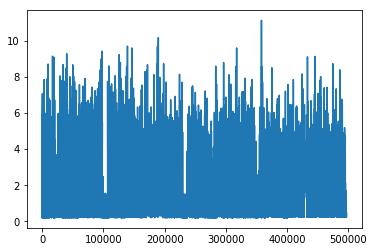

In [27]:
plt.plot(df[df['Season']=='Winter']['Global_active_power'].values)
df[df['Season']=='Winter']['Global_active_power'].describe()

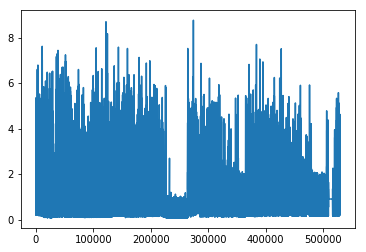

In [28]:
plt.plot(df[df['Season']=='Summer']['Global_active_power'].values)
df[df['Season']=='Summer']['Global_active_power'].describe()

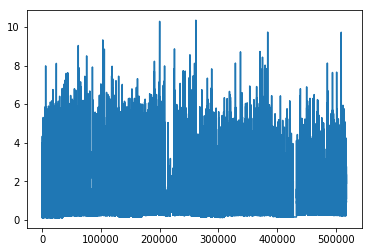

In [29]:
plt.plot(df[df['Season']=='Fall']['Global_active_power'].values)
df[df['Season']=='Fall']['Global_active_power'].describe()

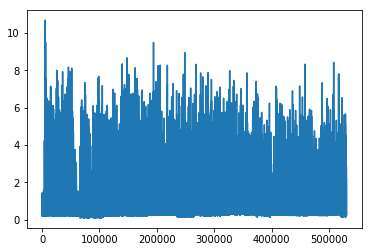

In [30]:
plt.plot(df[df['Season']=='Spring']['Global_active_power'].values)
df[df['Season']=='Spring']['Global_active_power'].describe()

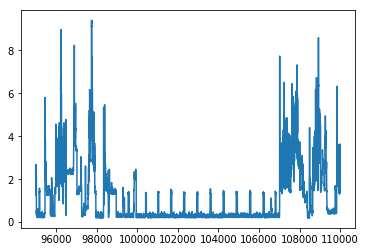

In [31]:
plt.plot(np.arange(95000,110000),df[df['Season']=='Winter']['Global_active_power'][95000:110000].values)

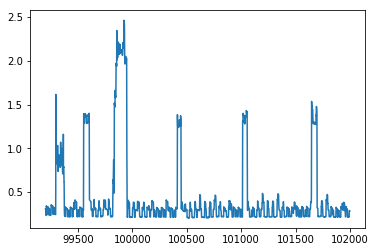

In [32]:
plt.plot(np.arange(99200,102000),df[df['Season']=='Winter']['Global_active_power'][99200:102000].values)

In [33]:
WinRefRange = (107000,237200)

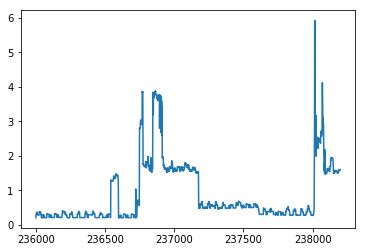

In [34]:
plt.plot(np.arange(236000,238200),df[df['Season']=='Winter']['Global_active_power'][236000:238200].values)

In [35]:
Maxx = (WinRefRange[1] - WinRefRange[0])

## Winter Wavelet

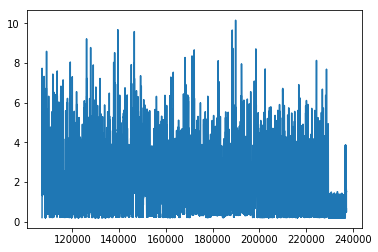

In [36]:
plt.plot(np.arange(107000,237200),df[df['Season']=='Winter']['Global_active_power'][107000:237200].values)
WinW = df[df['Season']=='Winter']['Global_active_power'][107000:237200].values

In [37]:
wRef = np.array(list(WinW)*3)

In [38]:
wRef

array([0.214, 0.214, 0.216, ..., 0.632, 0.67 , 0.65 ])

1.300032555043523

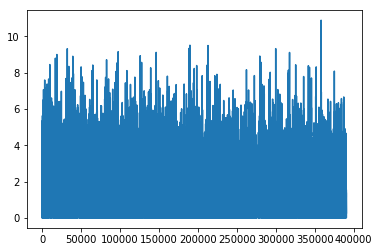

In [39]:
plt.plot(abs(wRef - df[df['Season']=='Winter']['Global_active_power'][:len(wRef)].values))
np.mean(abs(wRef - df[df['Season']=='Winter']['Global_active_power'][:len(wRef)].values))

### Plot usage for particluar days in Winter

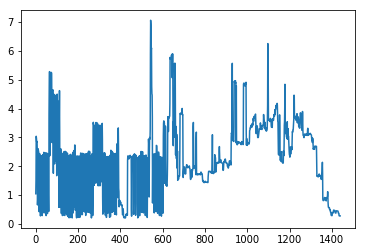

In [43]:
plt.plot(df[df['Season']=='Winter']['Global_active_power'][0:1440].values)

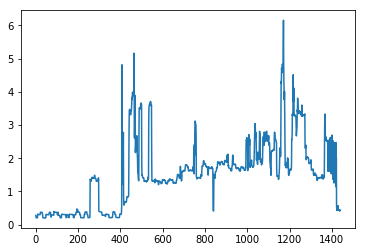

In [44]:
plt.plot(df[df['Season']=='Winter']['Global_active_power'][1440:2*1440].values)

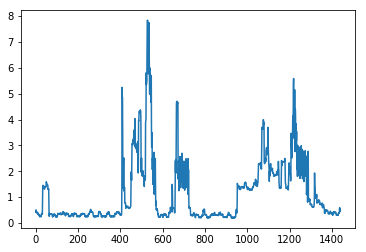

In [45]:
plt.plot(df[df['Season']=='Winter']['Global_active_power'][2*1440:3*1440].values)

In [47]:
# Number of Winter Days
WnDays = 496800/1440

In [48]:
Comm = np.array([np.mean(abs(df[df['Season']=='Winter']['Global_active_power'][i*1440:(i+1)*1440].values - df[df['Season']=='Winter']['Global_active_power'][0:1440].values)) for i in range(344)])

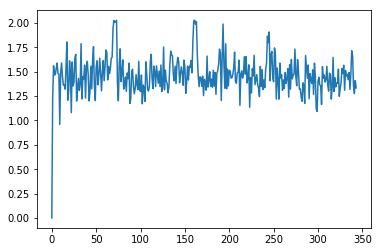

In [49]:
plt.plot(Comm)

In [74]:
np.mean(Comm)

1.4634804586563308

In [ ]:
for j in range(364):
    Comm = np.array([np.mean(abs(df[df['Season']=='Winter']['Global_active_power'][i*1440:(i+1)*1440].values - df[df['Season']=='Winter']['Global_active_power'][j*1440:(j+1)*1440].values)) for i in range(344)])
    C.append(np.mean(Comm))

In [54]:
np.sort(Comm)[-5:]

array([2.01397222, 2.024125  , 2.02560278, 2.02797361, 2.02860833])

In [ ]:
np.where()

In [57]:
for i in np.sort(Comm)[-5:]:
    for j in range(len(Comm)):
        if(i==Comm[j]):
            C.append([j,i])

In [66]:
D = [x[0] for x in C]
D
U = []

In [70]:
for i in D:
    i = int(i)
    U.append(np.array([np.mean(abs(df[df['Season']=='Winter']['Global_active_power'][i*1440:(i+1)*1440].values - df[df['Season']=='Winter']['Global_active_power'][j*1440:(j+1)*1440].values)) for j in range(344)]))

In [84]:
WW = [np.mean(i) for i in U]
WW

[1.1024727390180877,
 1.1734137031653746,
 1.162137701873385,
 1.1102966650516797,
 1.1697240633074935]

In [76]:
np.argmin(WW),np.min(WW) 

(0, 1.1024727390180877)

In [78]:
D

[163.0, 160.0, 70.0, 73.0, 161.0]

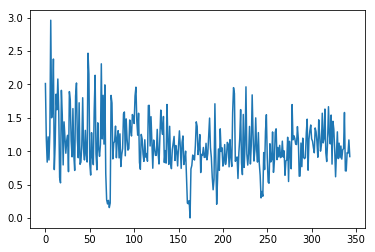

In [79]:
plt.plot(U[0])

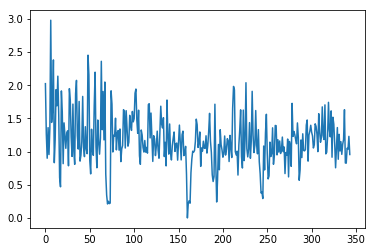

In [80]:
plt.plot(U[1])

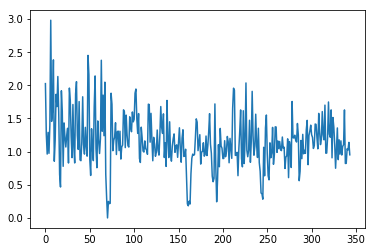

In [81]:
plt.plot(U[2])

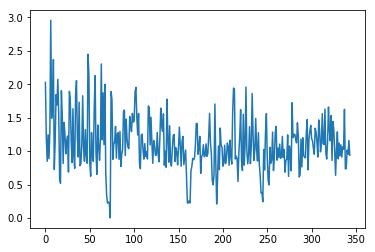

In [82]:
plt.plot(U[3])

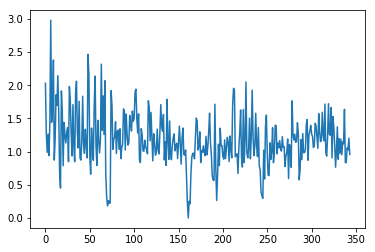

In [83]:
plt.plot(U[4])

In [85]:
np.argmax(U[4])

6

In [86]:
EE = np.array([np.mean(abs(df[df['Season']=='Winter']['Global_active_power'][6*1440:(6+1)*1440].values - df[df['Season']=='Winter']['Global_active_power'][j*1440:(j+1)*1440].values)) for j in range(344)])

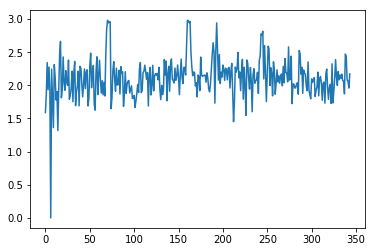

In [87]:
plt.plot(EE)

In [88]:
np.mean(EE)

2.1151087370801034

In [286]:
W = np.ones(5)

In [99]:
O = torch.tensor(W.reshape(-1,1))

In [95]:
Ut = torch.tensor(U)

In [112]:
Ut.shape

torch.Size([5, 344])

In [114]:
O.reshape(1,5)

tensor([[1., 1., 1., 1., 1.]])

In [117]:
Ut1 = Ut

In [129]:
Ut1.reshape(5,344)

tensor([[2.0140, 1.1902, 0.8362,  ..., 0.9696, 1.1688, 0.9195],
        [2.0241, 1.2672, 0.9001,  ..., 1.0346, 1.2296, 0.9559],
        [2.0256, 1.2619, 0.9629,  ..., 1.0249, 1.1393, 0.9518],
        [2.0280, 1.2057, 0.8479,  ..., 0.9517, 1.1592, 0.9391],
        [2.0286, 1.2743, 0.9868,  ..., 1.0220, 1.2018, 0.9572]],
       dtype=torch.float64)

In [272]:
def Mul(x,y):
    E = []
    for i in range(5):
        E.append(x[i]*y[i])
    return E

In [267]:
W= np.ones(5)

In [277]:
alpha = 0.1 
epochs = 20
errors = []

In [291]:
for epoch in range(epochs):
    Error = []
    Vec =  Mul(W,np.array(Vec))
    for q in range(5):
        Error.append(np.mean(np.array([np.mean(np.abs(np.array(Vec)[q] - np.array(WinData)[k*1440:(k+1)*1440])) for k in range(344)])))
    W = W - W*Error*alpha

In [256]:
WinData = torch.DoubleTensor(df[df['Season']=='Winter']['Global_active_power'].values)

In [288]:
W

array([47663962.79430553, 47663962.79430553, 47663962.79430553,
       47663962.79430553, 47663962.79430553])

In [289]:
Vec

[array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.])]

In [290]:
Error

[1.420524636627907,
 1.420524636627907,
 1.420524636627907,
 1.420524636627907,
 1.420524636627907]

In [181]:
    Weights = Weights * torch.DoubleTensor(Error) * torch.tensor(alpha)

[163.0, 160.0, 70.0, 73.0, 161.0]

In [184]:
Vec = torch.tensor([ df[df['Season']=='Winter']['Global_active_power'].values[int(i)*1440:(int(i)+1)*1440] for i in D  ])

In [185]:
Vec

tensor([[0.2140, 0.2160, 0.2160,  ..., 0.2940, 0.2980, 0.2980],
        [0.2200, 0.2200, 0.2200,  ..., 0.2880, 0.2880, 0.2880],
        [0.3200, 0.3200, 0.3180,  ..., 0.4200, 0.4160, 0.4140],
        [0.4040, 0.4020, 0.3100,  ..., 0.2300, 0.2280, 0.2260],
        [0.2900, 0.2900, 0.2900,  ..., 0.2120, 0.2100, 0.2120]],
       dtype=torch.float64)

In [196]:
Weights = Weights * 5

In [195]:
torch.abs((Mul(Weights,Vec) - WinData[0*1440:(1)*1440]))

tensor([0.4040, 0.0720, 1.6840,  ..., 1.1700, 1.1660, 1.1620],
       dtype=torch.float64)

In [199]:
Error = torch.DoubleTensor(Error)

In [229]:
Vec[0]

tensor([0.2140, 0.2160, 0.2160,  ..., 0.2940, 0.2980, 0.2980],
       dtype=torch.float64)

In [222]:
E = torch.DoubleTensor(np.zeros(1440))
Weights = x
y = Vec

In [208]:
x

tensor([1., 1., 1., 1., 1.])

In [209]:
y

tensor([[0.2140, 0.2160, 0.2160,  ..., 0.2940, 0.2980, 0.2980],
        [0.2200, 0.2200, 0.2200,  ..., 0.2880, 0.2880, 0.2880],
        [0.3200, 0.3200, 0.3180,  ..., 0.4200, 0.4160, 0.4140],
        [0.4040, 0.4020, 0.3100,  ..., 0.2300, 0.2280, 0.2260],
        [0.2900, 0.2900, 0.2900,  ..., 0.2120, 0.2100, 0.2120]],
       dtype=torch.float64)

In [210]:
for i in range(5):
    E+=x[i]*y[i]

In [218]:
torch.mean(torch.abs((E - WinData[300*1440:(301)*1440])))

tensor(1.1236, dtype=torch.float64)

In [237]:
Error

[tensor(1.1025, dtype=torch.float64),
 tensor(1.1734, dtype=torch.float64),
 tensor(1.1621, dtype=torch.float64),
 tensor(1.1103, dtype=torch.float64),
 tensor(1.1697, dtype=torch.float64)]